# 颜色直方图

让我们回到我们的分类任务：将图像分类为白天图像或夜晚图像。 通过之前的学习，你已经知道如何使用原始像素值构造亮度特征，现在我们将尝试把像素强度直方图（颜色直方图）作为 **特征向量**。

特征可以是有用值的数组。 即使你创建的过滤图像也被视为特征提取图像。特征向量是值的一维数组（或列表），当单个值不足以对图像进行分类时可以使用它们。

在这个 notebook 中，你将看到如何创建一种常见类型的特征向量：**直方图**。 直方图是显示不同高度条的数据的一种图形显示方式。 每个柱会将数据（在这个案例中为像素值）分组为不同的范围，每个柱的高度表示数据落入该范围的次数。 所以，如果一个柱的高度更高，则表示有更多的数据落在了该特定范围内。

让我们来看看HSV颜色直方图的样子。

### 导入资源

In [1]:
import cv2 # computer vision library

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

### 读入日/夜图像并将其标准化

我们将要分析两种图像：训练数据集中的一天一夜图像；同一场景的图像。 但是这些图像还没有被标准化，所以它们需要被调整为相同的。

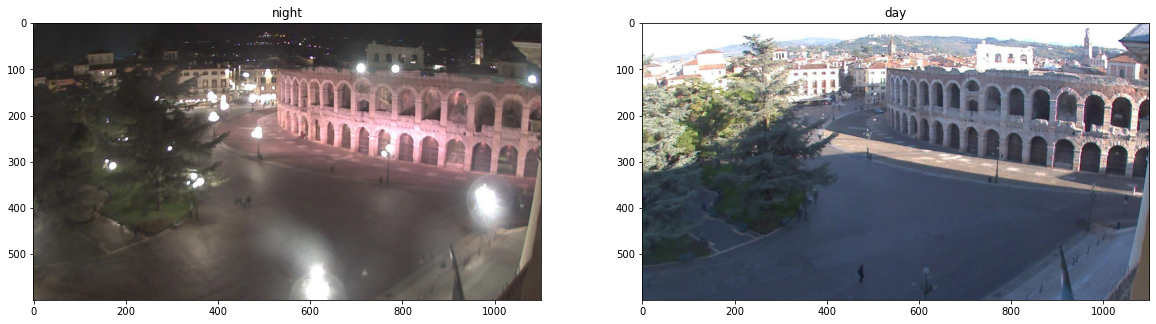

In [3]:
# Read in a day and a night image
# These are directly extracted by name -- do not change
day_image = mpimg.imread("../day_night_images/training/day/20151102_074952.jpg")
night_image = mpimg.imread("../day_night_images/training/night/20151102_175445.jpg")


# Make these images the same size
width = 1100
height = 600
night_image = cv2.resize(night_image, (width, height))
day_image = cv2.resize(day_image, (width, height))

# Visualize both images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('night')
ax1.imshow(night_image)
ax2.set_title('day')
ax2.imshow(day_image)

### 创建HSV直方图

首先，将这些图像转换为HSV颜色空间。 然后使用numpy的 [直方图函数](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.histogram.html) 将颜色值组合到范围中。 其中，Bin指的是数值范围，如暗度值为0-15，亮度值为200-255。

使用np.histogram（），你不必指定bin数量或范围，但在这里我已任意选择了个bin并指定其范围=（0,256），这样便于获得有序的bin尺寸。np.histogram（）返回两个数组的元组。例如，在这种情况下，h_hist [0]包含每个bin的计数，而h_hist [1]包含bin边（因此它比h_hist [0]长一个元素）。

为了将这些结果绘制成图，我们可以从bin边缘计算bin中心。 在这个示例例中，每个直方图都有相同的bin，所以我只使用rhist bin边缘就可以了：你可以定义bin的数量。

In [6]:
def hsv_histograms(rgb_image):
    # Convert to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Create color channel histograms
    h_hist = np.histogram(hsv[:,:,0], bins=32, range=(0, 180))
    s_hist = np.histogram(hsv[:,:,1], bins=32, range=(0, 256))
    v_hist = np.histogram(hsv[:,:,2], bins=32, range=(0, 256))
    
    # Generating bin centers
    bin_edges = h_hist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

    # Plot a figure with all three histograms
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bin_centers, h_hist[0])
    plt.xlim(0, 180)
    plt.title('H Histogram')
    plt.subplot(132)
    plt.bar(bin_centers, s_hist[0])
    plt.xlim(0, 256)
    plt.title('S Histogram')
    plt.subplot(133)
    plt.bar(bin_centers, v_hist[0])
    plt.xlim(0, 256)
    plt.title('V Histogram')
    
    return h_hist, s_hist, v_hist


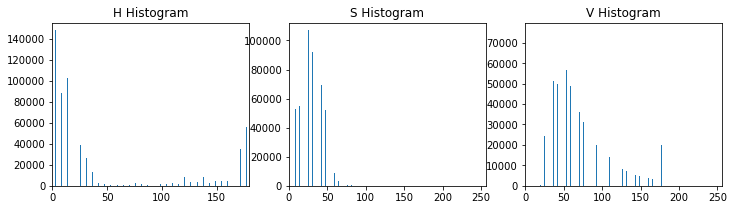

In [7]:
# Call the function for "night"
night_h_hist, night_s_hist, night_v_hist = hsv_histograms(night_image)


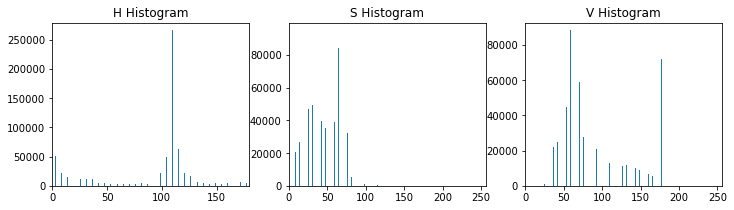

In [8]:
# Call the function for "day"
day_h_hist, day_s_hist, day_v_hist = hsv_histograms(day_image)

### 观察差异

In [9]:
# Which bin do most V values fall in?
# Does the Hue channel look helpful?
# What patterns can you see that might distinguish these two images?

# Out of 32 bins, if the most common bin is in the middle or high up, then it's likely day
fullest_vbin_day = np.argmax(day_v_hist[0])
fullest_vbin_night = np.argmax(night_v_hist[0])


print('Fullest Value bin for day: ', fullest_vbin_day)
print('Fullest Value bin for night: ', fullest_vbin_night)

Fullest Value bin for day:  10
Fullest Value bin for night:  5


In [10]:
## my
## TODO: Create and look at RGB histograms
# Practice what you've learned and look at RGB color histograms of these same images
def rgb_histograms(rgb_image):
    # # Convert to HSV
    # hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Create color channel histograms
    h_hist = np.histogram(rgb_image[:,:,0], bins=32, range=(0, 180))
    s_hist = np.histogram(rgb_image[:,:,1], bins=32, range=(0, 256))
    v_hist = np.histogram(rgb_image[:,:,2], bins=32, range=(0, 256))
    
    # Generating bin centers
    bin_edges = h_hist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

    # Plot a figure with all three histograms
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bin_centers, h_hist[0])
    plt.xlim(0, 180)
    plt.title('H Histogram')
    plt.subplot(132)
    plt.bar(bin_centers, s_hist[0])
    plt.xlim(0, 256)
    plt.title('S Histogram')
    plt.subplot(133)
    plt.bar(bin_centers, v_hist[0])
    plt.xlim(0, 256)
    plt.title('V Histogram')
    
    return h_hist, s_hist, v_hist


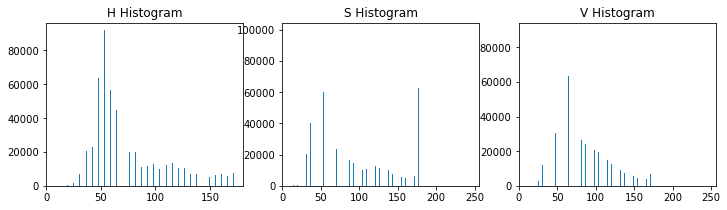

In [11]:
# Call the function for "day"
day_R_hist, day_G_hist, day_B_hist =rgb_histograms(day_image)

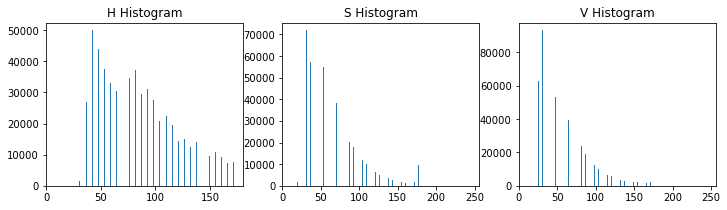

In [12]:
night_h_hist, night_s_hist, night_v_hist = rgb_histograms(night_image)

### 求和并创建特征向量

为了保持空间信息，对沿图像的列或行的像素值进行求和也是一种有用的方法，这样可以让你在空间中看到各种颜色值的尖峰。

我们以夜间图像为例， 这些图像大多是黑暗的，但有很多来自人造灯光的小亮点。 我将查看图像中的Value组件，使用np.sum（）将各列中的像素值相加，然后将该总和绘制成图。

### TODO：将白天图像的V分量进行求和，并与夜晚图像进行对比

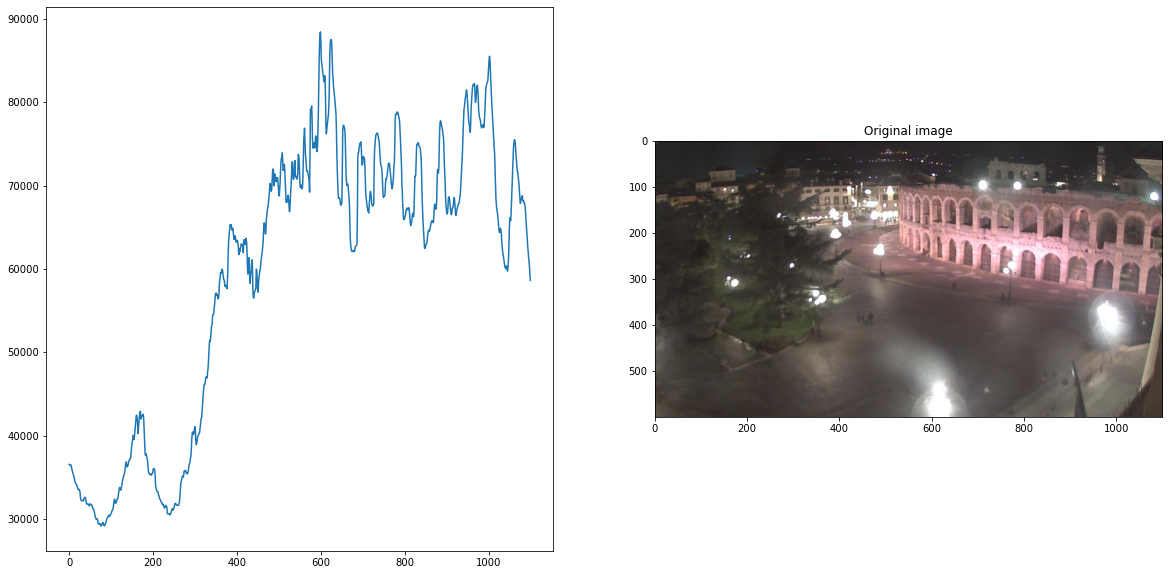

In [13]:
# Convert the night image to HSV colorspace
hsv_night = cv2.cvtColor(night_image, cv2.COLOR_RGB2HSV)

# Isolate the V component
v = hsv_night[:,:,2]

# Sum the V component over all columns (axis = 0)
v_sum = np.sum(v[:,:], axis=0)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax2.set_title('Value sum over columns')
ax1.plot(v_sum)

ax2.set_title('Original image')
ax2.imshow(night_image, cmap='gray')